In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

Sourses:
https://news.gallup.com/poll/1690/religion.aspx 
https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_religiosity
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4603674
https://worldpopulationreview.com/460fdb35-c0f2-4e24-ab2a-082a41dc32ee

In [3]:
rel = pd.read_html("https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_religiosity")[2]

In [4]:
IQ = pd.read_csv("data\csvData.csv")

In [5]:
resiq = IQ.merge(rel, how='left',  left_on="State", right_on="Stateor District")[['State', 'averageIQ', 'Believe in God with Certainty']]

In [6]:
resiq['Believe in God with Certainty'] = resiq['Believe in God with Certainty'].apply(lambda x: int(x.rstrip('%')))

In [7]:
resiq = resiq.rename(columns={'averageIQ':'Average IQ', 'Believe in God with Certainty': 'Percentage of religiosity'})

In [20]:
corr = resiq.set_index('State').corr(method = 'pearson')['Average IQ']['Percentage of religiosity']

In [9]:
relbyyear = pd.read_html('https://news.gallup.com/poll/1690/religion.aspx')[0]

In [10]:
relbyyear = relbyyear.T.iloc[:9].reset_index().drop('level_1', axis=1).rename(columns={'level_0':'index'}).set_index('index').T.rename(columns={'Unnamed: 0_level_0':'Year'}).iloc[:73].dropna()

In [11]:
relbyyear = relbyyear.sort_values('Year')

In [12]:
relbyyear = relbyyear.set_index('Year')

In [13]:
relbyyear['None'] = relbyyear['None'].apply(int)

In [14]:
relbyyear['Religiosity'] = 100 - relbyyear['None']

In [15]:
relbyyear

index,Protestant,Christian (nonspecific),Catholic,Jewish,Mormon,Other,None,No answer,Religiosity
Year,,,,,,,,,
1999,52,2,27,1,2,6,8,2,92
2000,52,5,25,2,2,5,8,2,92
2001,53,4,25,2,2,4,8,2,92
2002,49,7,24,2,2,4,10,2,90
2003,49,7,24,2,2,4,10,2,90
2004,50,7,24,2,2,4,9,2,91
2005,49,7,23,2,2,5,10,2,90
2006,49,6,22,2,2,5,12,2,88
2007,51,5,23,3,2,4,11,2,89


In [16]:
import requests

url = 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4603674/'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

dfs = pd.read_html(r.text)


In [17]:
IQbyYear = dfs[0].rename(columns={'Unnamed: 0':'Year'}).iloc[7:11].set_index('Year')

I decided to check the correlation between the IQ level of the population and the percentage of religiosity in the US states. The result is negative coring (-0.5), which indicates that with an increase in IQ, a person's religiosity decreases.
Next, I decided to check how the values of religiosity and IQ in general changed over the years to see if there was any relationship. In general, here, I found that despite the fact that the importance of people who believe in God increases, the IQ values on average decrease, there is concern that a whole range of social, economic and historical factors are not taken into account, each of which, as has been shown, interacts in various ways with both religion and IQ.

In conclusion, we see a certain coringation. It can be said that religion is losing its specific moral and spiritual function.

[Text(0.5, 1.0, 'Avarage IQ in USA'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Avarage IQ')]

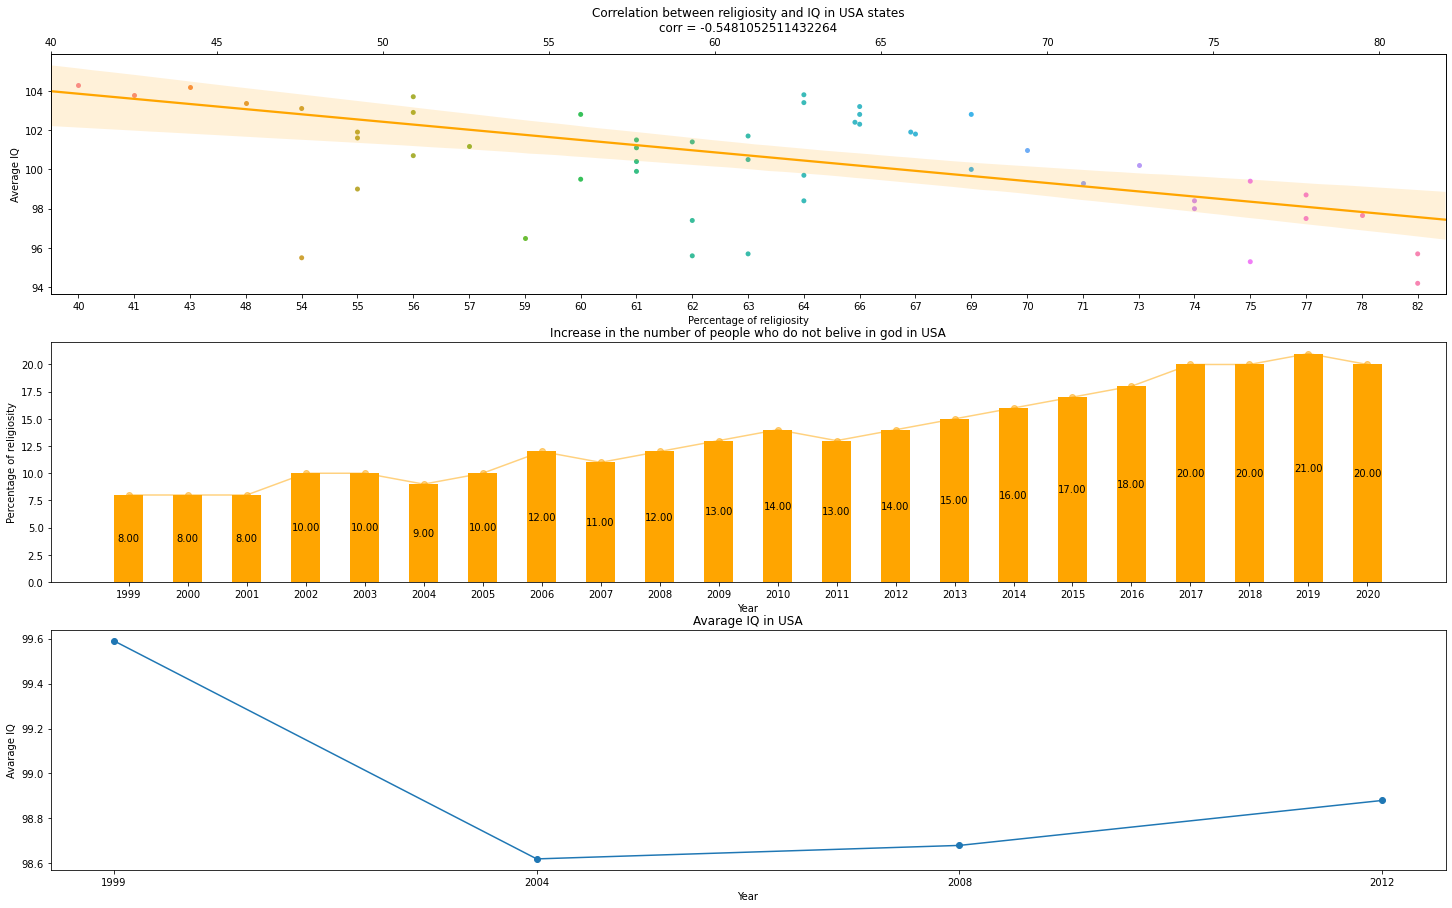

In [21]:
fig, ax = plt.subplots(3, figsize=(25,15))
ax2 = ax[0].twiny()

sns.swarmplot(x="Percentage of religiosity", y="Average IQ", data= resiq, ax=ax[0])
sns.regplot(x="Percentage of religiosity", y="Average IQ",  data= resiq, color='orange', scatter_kws={"alpha" : 0.0},  ax=ax2)
ax[0].set(title=f'Correlation between religiosity and IQ in USA states\ncorr = {corr}')
ax2.set(xlabel='')
ax2.grid(False) 



ax[1].set(title='Increase in the number of people who do not belive in god in USA', xlabel='Year', ylabel='Percentage of religiosity')
ax[1].plot(relbyyear['None'], '-o', color='orange', alpha=0.5)

bar = ax[1].bar(np.arange(len(relbyyear['None'])),relbyyear['None'], width=0.5, color='orange')
ax[1].bar_label(bar, label_type='center' ,fmt='%.2f')

ax[1].plot()

ax[2].plot(IQbyYear.Average, '-o')
ax[2].set(title='Avarage IQ in USA', xlabel='Year', ylabel='Avarage IQ')
